In [1]:
import matplotlib.pyplot as plt
import numpy as np

1. Poisson Distribution:

Output with (lambda,k) = (1,0):
0.36787944117144233
Output with (lambda,k) = (5,10):
0.018132788707821874
Output with (lambda,k) = (3,20):
7.135378768777135e-11
Output with (lambda,k) = (2.6,40):
3.6151239949376895e-33

2. Random Number Generator:

Seed set to 123456


(array([50078., 50042., 50451., 49903., 49558., 50033., 49933., 50230.,
        49869., 49886., 50162., 50295., 50025., 50006., 49997., 49980.,
        50048., 50457., 49789., 50258.]),
 array([1.71592982e-06, 5.00015343e-02, 1.00001353e-01, 1.50001171e-01,
        2.00000989e-01, 2.50000808e-01, 3.00000626e-01, 3.50000444e-01,
        4.00000263e-01, 4.50000081e-01, 4.99999899e-01, 5.49999718e-01,
        5.99999536e-01, 6.49999354e-01, 6.99999173e-01, 7.49998991e-01,
        7.99998809e-01, 8.49998628e-01, 8.99998446e-01, 9.49998264e-01,
        9.99998083e-01]),
 <a list of 20 Patch objects>)

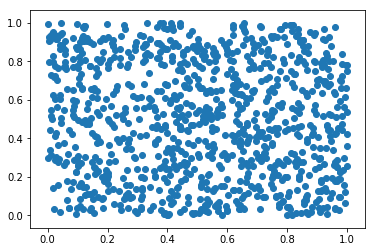

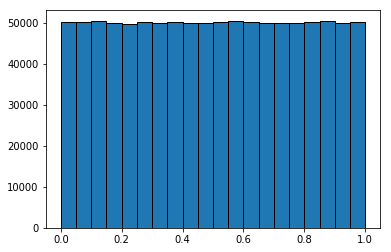

In [35]:
# Factorial function. Raises ValueError if x is not integral or is negative.
def factorial(n):    
    fact = 1
    
    if n < 0:
        raise ValueError('factorial() not defined for negative values')
    
    elif type(n) == float:
        raise ValueError('factorial() only accepts integral values')
        
    # The factorial function is defined by the product
    # n! = 1*2*3...*(n-2)*(n-1)*n
    else:
        for i in range (1,n+1):
            fact = fact * i
        
    return float(fact)

# Poisson probability distribution for integer k, given a positive mean lambda. 
def Poisson_probability_distribution(Lambda, k):
    Poisson = (Lambda**k)*(np.e**(-Lambda))/factorial(k)
    return Poisson

# Input values as required. 
Lambda = [1,5,3,2.6]
k = [0,10,20,40]

print('1. Poisson Distribution:')
print()

# Output results of the Poisson distribution.
[Poisson_probability_distribution(Lambda[i],k[i]) for i in range(len(k))]
for i in range(len(k)):
    print('Output with (lambda,k) = ('+str(Lambda[i])+','+str(k[i])+'):')
    print(Poisson_probability_distribution(Lambda[i],k[i]))
    
# Random Number Generator.
# All three methods from lecture slides are combined by applying 
# the input as the output of the previous method. 
print()
print('2. Random Number Generator:')
print()

# Set seed.
I0=123456
print('Seed set to '+str(I0))

# (Multip.) Linear Congruential Generators. 
# Parameters acquired from lecture slides.
def lcg(I=I0, m=2**64-1, a=5667594924, c=1013904223):
    
    global I0
    I0 = (a*I0 + c) % m
    return I0

# Multiply with Carry (MWC) with base b = 2**32
def mwc(a=4294957665):
    
    # Use the output of LCG as the input of MWC. 
    x = a*(lcg() & (2**32-1))+(lcg()>>32)
    #period = (2**32*a-2)/2
    return x

# 64-bit XOR-shift.
def xor_shift_64():
    
    # Use the output of MWC as the input of XOR-shift.
    X = mwc()
    Y = mwc()
    Z = mwc()
    W = mwc()
    
    # Parameters acquired from lecture notes. 
    a1 = 21
    a2 = 35
    a3 = 4
    bit64 = 0xffffffffffffffff
    
    t = X^(X<<a2) & bit64 # Keep in 64-bit.
    X = Y
    Y = Z
    Z = W
    W = W^(W>>a1)^t^(t>>a3) & bit64 # Keep in 64-bit.
    
    P = 2**64-1
    
    return W / P

x_i = []
x_i_plus_1 = []

for i in range(1000):
    x_i.append(xor_shift_64())
    x_i_plus_1.append(xor_shift_64())
plt.figure()
plt.scatter(x_i, x_i_plus_1)

for i in range(1000000):
    x_i.append(xor_shift_64())
    x_i_plus_1.append(xor_shift_64())
plt.figure()
plt.hist(x_i, bins=20, histtype='bar', ec='black')